# ....................................Bike Sharing Assignment...................................

### Submitted by -  ``AYUSH CHAUHAN``

## IMPORT PACKAGES

In [1]:

import warnings      # Supress Warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn import preprocessing
from IPython.core.interactiveshell import InteractiveShell
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# from collections import defaultdicta

from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#import data set
data = pd.read_csv('day.csv')
# Check the head of the dataset
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Check the shape of df

print(data.shape)

(730, 16)


#### Observation
 - Dataset has 730 rows and 16 columns. 
 - Except one column, all other are either float or integer type. One column is date type. 
 - Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type. 
 - We will have to analyse and decide whether to convert them to categorical or treat as integer. 
 ---

In [4]:
# Chcek the descriptive information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


In [5]:
#Check the descriptive  statistics

print(data.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.5448

## DATA QUALITY CHECK

#### Check for NULL/MISSING values

In [6]:
# percentage of missing values in each column
round(100*(data.isnull().sum()/len(data.index)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

- There are NO MISSING/NULL values either in columns or rows. 
---

## Data Cleaning

In [7]:
# fixing mnth column
def ass_mnth(x):
    return x.map({
        1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
        7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'
    })
data[['mnth']] = data[['mnth']].apply(ass_mnth)

In [8]:
# fixing season column
def ass_season(x):
    return x.map({
        1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'
    })
data[['season']] = data[['season']].apply(ass_season)

In [9]:
# fixing season column
def ass_weathersit(x):
    return x.map({
        1:'Clear', 2:'Mist+Cloudy', 3:'Light_Rain'
    })
data[['weathersit']] = data[['weathersit']].apply(ass_weathersit)

In [10]:
# fixing season column
def ass_yr(x):
    return x.map({
        0:'2018', 1:'2019'
    })
data[['yr']] = data[['yr']].apply(ass_yr)

#### Removing redundant & unwanted columns
Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis: 
- ``instant`` : Its only an index value 
- ``dteday`` : This has the date, Since we already have seperate columns for 'year' & 'month'. 
- ``casual`` & ``registered`` : Both these columns contains the count of bike booked by different categories of customers.Since our objective is to find the total count of bikes and not by specific categoy, we will ignore these two columns. More over, we have created a new variable to have the ratio of these customer types. - We will save the new dataframe as ``data_new``, so that the original dataset is preserved for any future analysis/validation 

---

In [11]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [12]:
data_new = data[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Creating Dummy Variables

We will create DUMMY variables for 4 categorical variables ``'mnth'``, ``'weekday'``, ``'season'`` & ``'weathersit'``. 
- Before creating dummy variables, we will have to convert them into 'category' data types. 
---

In [13]:
# Convert to 'category' data type
data_new['mnth'] = data_new['mnth'].astype('category') 
data_new['weekday'] = data_new['weekday'].astype('category') 
data_new['season'] = data_new['season'].astype('category') 
data_new['weathersit'] = data_new['weathersit'].astype('category')
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    object  
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(3), object(1)
memory usage: 49.7+ KB


In [14]:
# Create Dummy variable and Droping original variable for which the dummy was created
# Also Droping first dummy variable for each set of dummies created.
data_new = pd.get_dummies(data_new,drop_first=True)
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   holiday                 730 non-null    int64  
 1   workingday              730 non-null    int64  
 2   temp                    730 non-null    float64
 3   atemp                   730 non-null    float64
 4   hum                     730 non-null    float64
 5   windspeed               730 non-null    float64
 6   cnt                     730 non-null    int64  
 7   season_Spring           730 non-null    uint8  
 8   season_Summer           730 non-null    uint8  
 9   season_Winter           730 non-null    uint8  
 10  yr_2019                 730 non-null    uint8  
 11  mnth_Aug                730 non-null    uint8  
 12  mnth_Dec                730 non-null    uint8  
 13  mnth_Feb                730 non-null    uint8  
 14  mnth_Jan                730 non-null    ui

## SPLITTING THE DATA

In [15]:
# Check the shape before spliting

data_new.shape

(730, 30)

Splitting the data to Train and Test: - We will now split the data into TRAIN and TEST (70:30 ratio) 
- We will use train_test_split method from sklearn package for this 
---

In [16]:
from sklearn.model_selection import train_test_split

# We specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(data_new, train_size = 0.70, test_size = 0.30, random_state = 333)

#### Verify the info and shape of the dataframes after split:

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   holiday                 510 non-null    int64  
 1   workingday              510 non-null    int64  
 2   temp                    510 non-null    float64
 3   atemp                   510 non-null    float64
 4   hum                     510 non-null    float64
 5   windspeed               510 non-null    float64
 6   cnt                     510 non-null    int64  
 7   season_Spring           510 non-null    uint8  
 8   season_Summer           510 non-null    uint8  
 9   season_Winter           510 non-null    uint8  
 10  yr_2019                 510 non-null    uint8  
 11  mnth_Aug                510 non-null    uint8  
 12  mnth_Dec                510 non-null    uint8  
 13  mnth_Feb                510 non-null    uint8  
 14  mnth_Jan                510 non-null    

In [18]:
df_train.shape

(510, 30)

In [19]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   holiday                 219 non-null    int64  
 1   workingday              219 non-null    int64  
 2   temp                    219 non-null    float64
 3   atemp                   219 non-null    float64
 4   hum                     219 non-null    float64
 5   windspeed               219 non-null    float64
 6   cnt                     219 non-null    int64  
 7   season_Spring           219 non-null    uint8  
 8   season_Summer           219 non-null    uint8  
 9   season_Winter           219 non-null    uint8  
 10  yr_2019                 219 non-null    uint8  
 11  mnth_Aug                219 non-null    uint8  
 12  mnth_Dec                219 non-null    uint8  
 13  mnth_Feb                219 non-null    uint8  
 14  mnth_Jan                219 non-null    u

In [20]:
df_test.shape

(219, 30)

## EXPLORATORY DATA ANALYSIS

NOTE: 
- We will perform the EDA on TRAINING (df_train) Dataset. 
---

### Visualising Numeric Variables

In [21]:
df_train.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_Spring', 'season_Summer', 'season_Winter', 'yr_2019',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weathersit_Light_Rain', 'weathersit_Mist+Cloudy'],
      dtype='object')

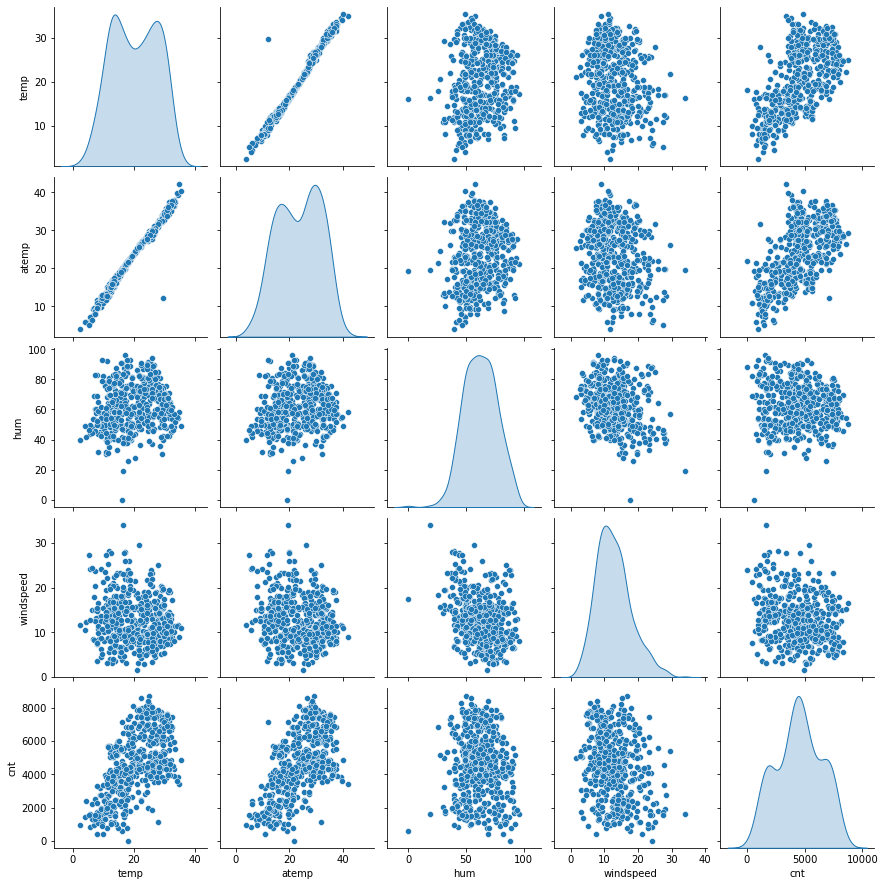

In [22]:
# Create a new dataframe of only numeric variables:

data_num=df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(data_num, diag_kind='kde')
plt.show()

OBSERVAYION: 
- The above Pair-Plot tells us that there is a LINEAR RELATION between ``'temp'``,``'atemp'`` and ``'cnt'``. 
---

## Visualising Catagorical Variables

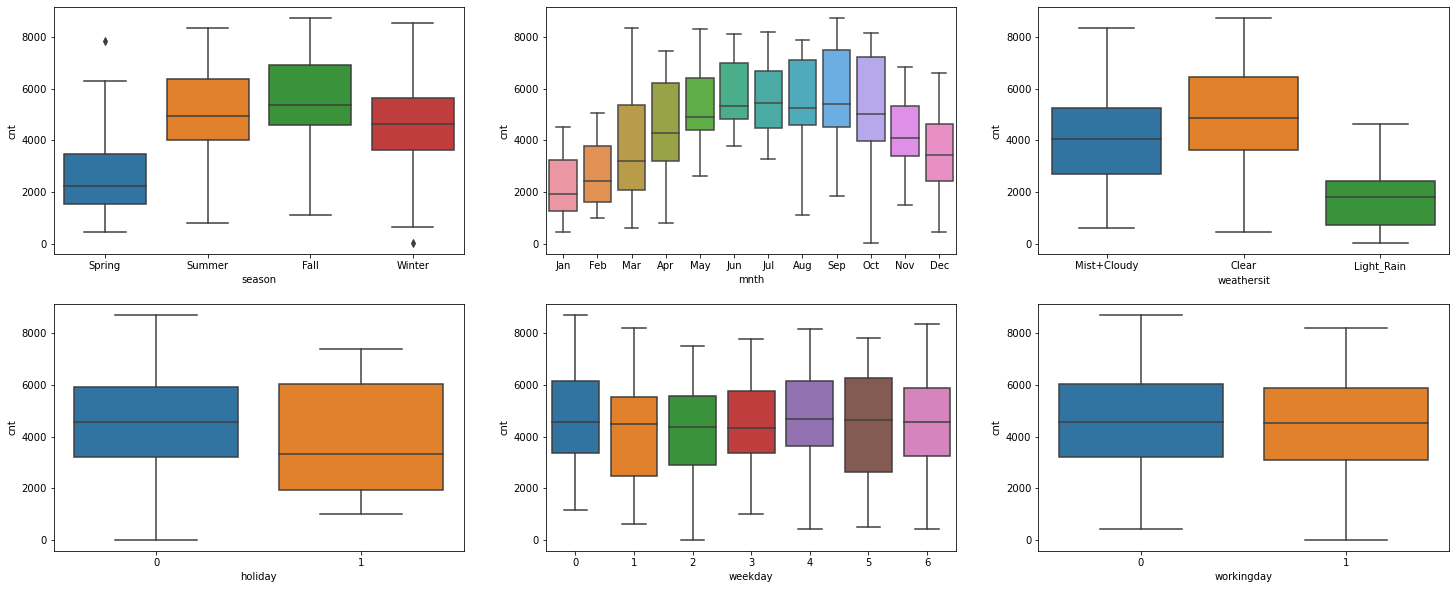

In [23]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = data)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.show()

INSIGHT: 

There were 6 categorical variables in the dataset. I used Box plot (refer the fig above) to study their effect on the dependent variable (‘cnt’) . The inference that I could derive were: 
- ``season``: Almost 32% of the bike booking were happening in Fall with a median of over 5000 booking (for the period of 2 years). This was followed by Summer & Winter with 27% & 25% of total booking. This indicates, season can be a good predictor for the dependent variable. 
- ``mnth``: Almost 10% of the bike booking were happening in the months May,Jun,Jul,Aug & Sep with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable. 
- ``weathersit``: Almost 67% of the bike booking were happening during ‘Clear' with a median of close to 5000 booking (for the period of 2 years). This was followed by Mist+Cloudy with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable. 
- ``holiday``: Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable. 
- ``weekday``: weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not. 
- ``workingday``: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable. 
---

## Correlation Matrix

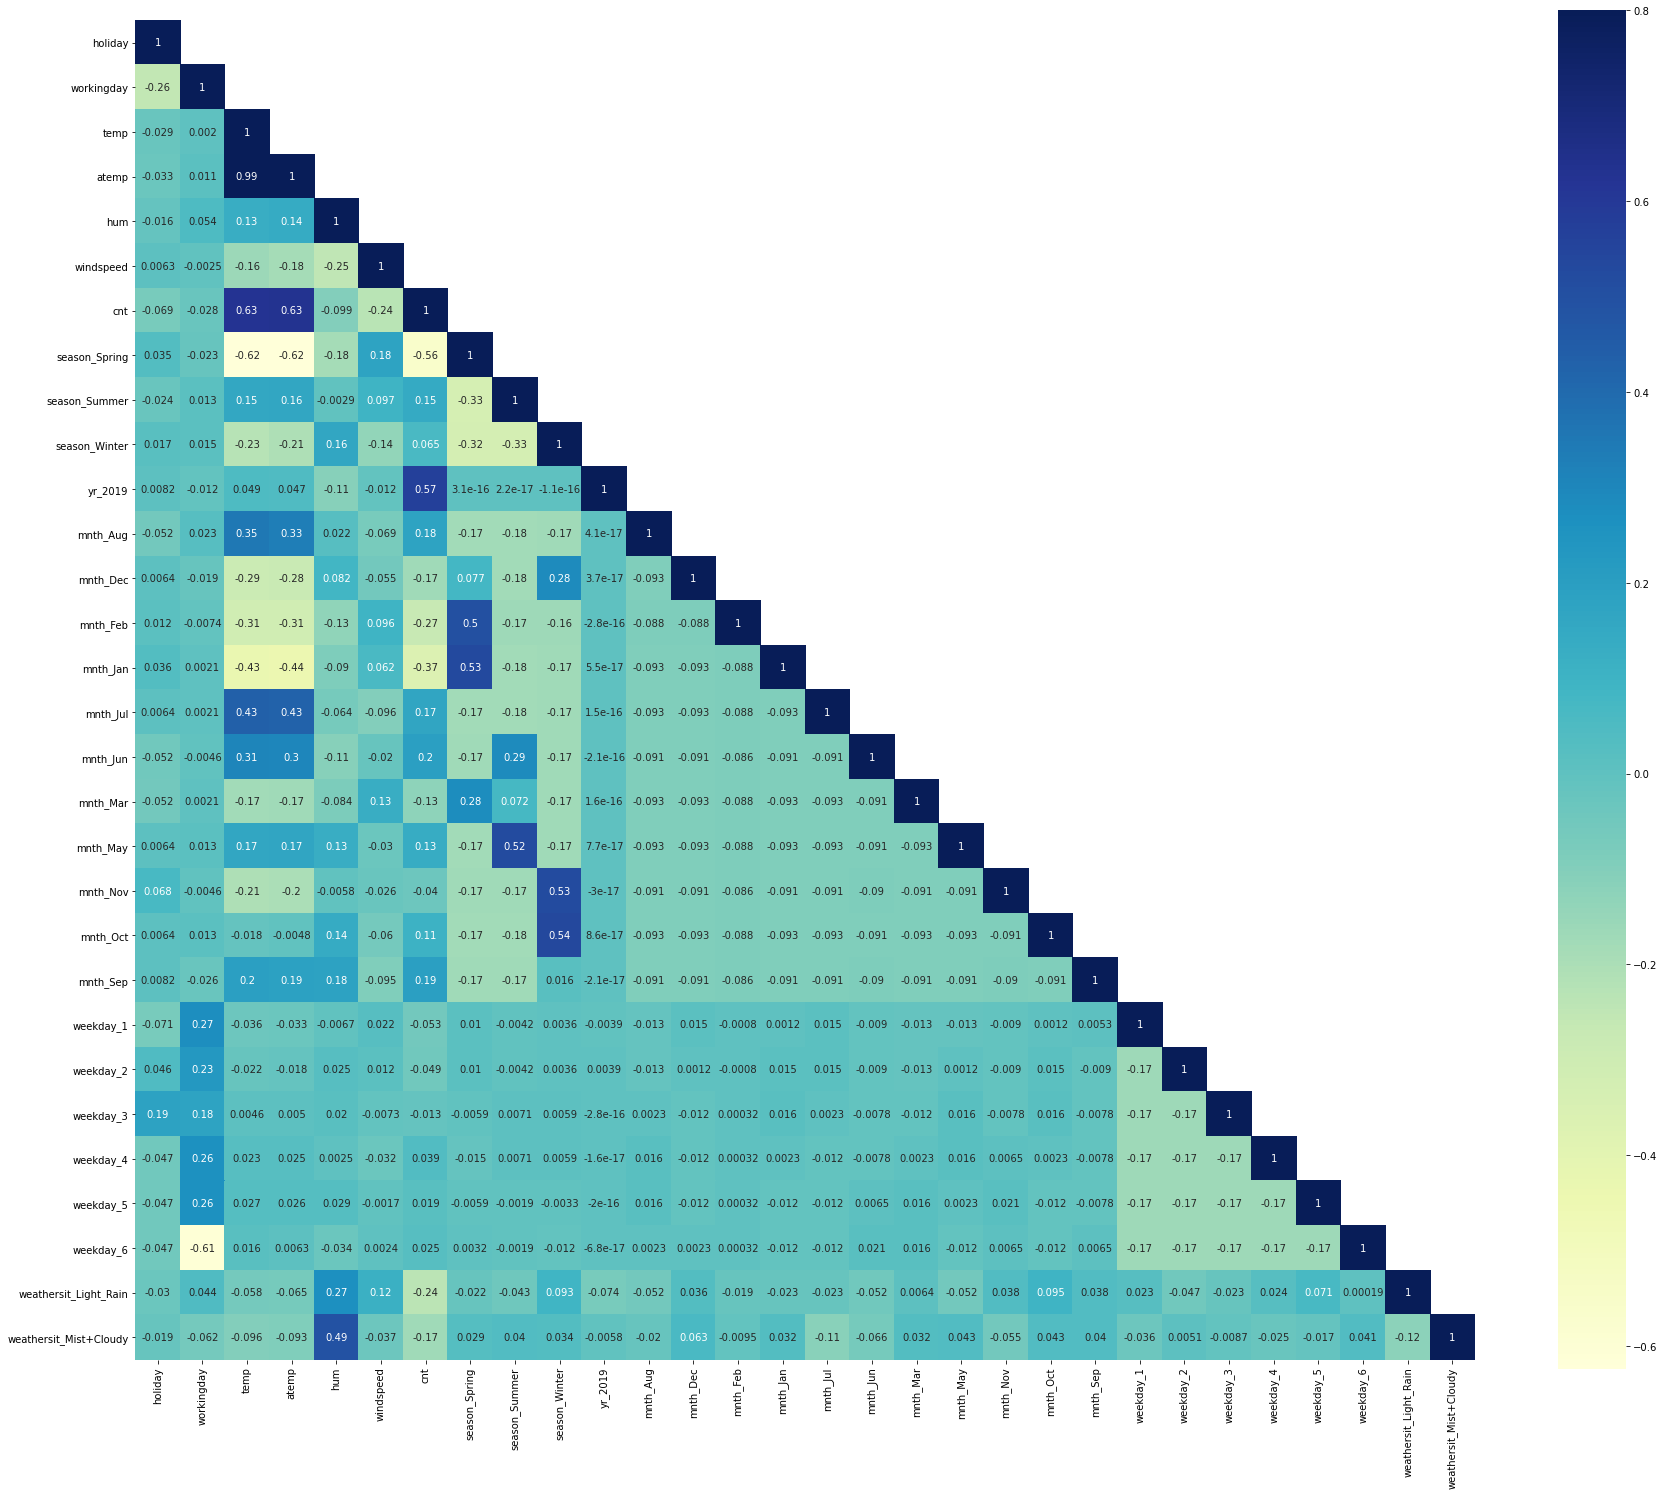

In [24]:
# Let's check the correlation coefficients to see which variables are highly correlated. Note:
# here im considering only those variables (dataframe: bike_new) that were chosen for analysis
cor = data_new.corr()
plt.figure(figsize = (30,25))
mask = np.array(cor)
mask[ np.tril_indices_from(mask) ] = False
sns.heatmap(cor, annot = True, cmap="YlGnBu", mask=mask, vmax=0.8, square=True)
plt.show()

INSIGHT: 
- The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable. 
- We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model. ---

## RESCALING THE FEATURES

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()

In [27]:
# Checking the values before scaling
df_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light_Rain,weathersit_Mist+Cloudy
483,0,1,18.791653,22.50605,58.7083,7.832836,6304,0,1,0,...,0,0,1,0,0,0,0,0,0,0
650,0,0,16.126653,19.56980,49.4583,9.791514,7109,0,0,1,...,1,0,0,0,0,0,0,0,0,0
212,0,1,31.638347,35.16460,55.0833,10.500039,4266,0,0,0,...,0,0,0,0,1,0,0,0,0,0
714,0,1,14.862500,18.49690,83.8750,6.749714,3786,0,0,1,...,0,0,1,0,0,0,0,0,0,1
8,0,1,5.671653,5.80875,43.4167,24.250650,822,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [28]:
# Apply scaler() to all the numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [29]:
# Checking values after scaling
df_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light_Rain,weathersit_Mist+Cloudy
483,0,1,0.497426,0.487055,0.609956,0.194850,0.722734,0,1,0,...,0,0,1,0,0,0,0,0,0,0
650,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,1,...,1,0,0,0,0,0,0,0,0,0
212,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,0,0,...,0,0,0,0,1,0,0,0,0,0
714,0,1,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,1,...,0,0,1,0,0,0,0,0,0,1
8,0,1,0.098690,0.048706,0.451083,0.700017,0.092039,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [30]:
df_train.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light_Rain,weathersit_Mist+Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.023529,0.692157,0.540901,0.515631,0.647390,0.346318,0.515144,0.24902,0.247059,0.241176,...,0.084314,0.082353,0.143137,0.152941,0.131373,0.139216,0.147059,0.143137,0.025490,0.341176
std,0.151726,0.462054,0.227898,0.213626,0.149722,0.160266,0.224281,0.43287,0.431725,0.428217,...,0.278131,0.275172,0.350557,0.360284,0.338139,0.346511,0.354512,0.350557,0.157763,0.474570
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.359468,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.516337,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.685861,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## BUILDING A LINEAR MODEL

### Dividing into X and Y sets for the model building

In [31]:
y_train = df_train.pop('cnt')
X_train = df_train

### RFE
-Recursive feature elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [32]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [33]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [34]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', False, 10),
 ('workingday', False, 7),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 13),
 ('season_Winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_Aug', False, 11),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', False, 9),
 ('mnth_May', False, 8),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_1', False, 3),
 ('weekday_2', False, 2),
 ('weekday_3', False, 4),
 ('weekday_4', False, 6),
 ('weekday_5', False, 5),
 ('weekday_6', False, 15),
 ('weathersit_Light_Rain', True, 1),
 ('weathersit_Mist+Cloudy', True, 1)]

In [35]:
var = X_train.columns[rfe.support_]
var

Index(['temp', 'atemp', 'hum', 'windspeed', 'season_Spring', 'season_Winter',
       'yr_2019', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov',
       'mnth_Sep', 'weathersit_Light_Rain', 'weathersit_Mist+Cloudy'],
      dtype='object')

In [36]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[var]

## Building Linear Model using 'STATS MODEL'

### Model 1

#### VIF Check

In [37]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,353.54
1,atemp,352.02
2,hum,23.93
3,windspeed,5.15
4,season_Spring,4.56
5,season_Winter,2.77
9,mnth_Jan,2.42
14,weathersit_Mist+Cloudy,2.29
8,mnth_Feb,2.28
6,yr_2019,2.05


In [38]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [39]:
# Check the parameters obtained

lr1.params

const                     0.392882
temp                      0.293277
atemp                     0.133309
hum                      -0.170856
windspeed                -0.182617
season_Spring            -0.088663
season_Winter             0.076156
yr_2019                   0.230435
mnth_Dec                 -0.069304
mnth_Feb                 -0.049005
mnth_Jan                 -0.068918
mnth_Jul                 -0.049823
mnth_Nov                 -0.071463
mnth_Sep                  0.059465
weathersit_Light_Rain    -0.264079
weathersit_Mist+Cloudy   -0.047365
dtype: float64

In [40]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     168.4
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          3.83e-183
Time:                        21:00:15   Log-Likelihood:                 500.95
No. Observations:                 510   AIC:                            -969.9
Df Residuals:                     494   BIC:                            -902.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

### Model 2

NOTE: 
- Removing the variable 'atemp' based on its High p-value & High VIF

In [41]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

### VIF Check

In [42]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,23.42
0,temp,16.95
2,windspeed,5.04
3,season_Spring,4.55
4,season_Winter,2.74
8,mnth_Jan,2.41
7,mnth_Feb,2.28
13,weathersit_Mist+Cloudy,2.28
5,yr_2019,2.05
10,mnth_Nov,1.87


In [43]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [44]:
# Check the parameters obtained

lr2.params

const                     0.395902
temp                      0.415618
hum                      -0.168786
windspeed                -0.187299
season_Spring            -0.088553
season_Winter             0.077183
yr_2019                   0.230468
mnth_Dec                 -0.069832
mnth_Feb                 -0.049238
mnth_Jan                 -0.070386
mnth_Jul                 -0.049787
mnth_Nov                 -0.072215
mnth_Sep                  0.058620
weathersit_Light_Rain    -0.265242
weathersit_Mist+Cloudy   -0.047723
dtype: float64

In [45]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     180.4
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          4.46e-184
Time:                        21:00:16   Log-Likelihood:                 500.47
No. Observations:                 510   AIC:                            -970.9
Df Residuals:                     495   BIC:                            -907.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

### Model 3

NOTE: 
- Removing the variable 'hum' based on its Very High 'VIF' value. 
- Even though the VIF of hum is second highest, we decided to drop 'hum' and not 'temp' based on general intuition that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.

In [46]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

### VIF Check

In [47]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.24
1,windspeed,5.03
2,season_Spring,4.20
3,season_Winter,2.42
7,mnth_Jan,2.30
6,mnth_Feb,2.24
4,yr_2019,2.04
9,mnth_Nov,1.82
12,weathersit_Mist+Cloudy,1.53
5,mnth_Dec,1.52


In [48]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [49]:
# Check the parameters obtained

lr3.params

const                     0.303644
temp                      0.382729
windspeed                -0.152288
season_Spring            -0.086553
season_Winter             0.071272
yr_2019                   0.234951
mnth_Dec                 -0.082184
mnth_Feb                 -0.054138
mnth_Jan                 -0.076869
mnth_Jul                 -0.042346
mnth_Nov                 -0.073365
mnth_Sep                  0.053151
weathersit_Light_Rain    -0.315355
weathersit_Mist+Cloudy   -0.075665
dtype: float64

In [50]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     185.8
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          4.71e-181
Time:                        21:00:16   Log-Likelihood:                 490.54
No. Observations:                 510   AIC:                            -953.1
Df Residuals:                     496   BIC:                            -893.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

### Model 4

NOTE: 
- Removing the variable 'mnth_Jul' based on its p-value.

In [51]:
X_train_new = X_train_new.drop(["mnth_Jul"], axis = 1)

### VIF Check

In [52]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,4.90
0,temp,4.25
2,season_Spring,4.19
3,season_Winter,2.38
7,mnth_Jan,2.29
6,mnth_Feb,2.24
4,yr_2019,2.04
8,mnth_Nov,1.82
5,mnth_Dec,1.52
11,weathersit_Mist+Cloudy,1.51


In [53]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [54]:
# Check the parameters obtained

lr4.params

const                     0.314543
temp                      0.353954
windspeed                -0.148048
season_Spring            -0.087976
season_Winter             0.072713
yr_2019                   0.235276
mnth_Dec                 -0.085897
mnth_Feb                 -0.057227
mnth_Jan                 -0.082341
mnth_Nov                 -0.076882
mnth_Sep                  0.059698
weathersit_Light_Rain    -0.317703
weathersit_Mist+Cloudy   -0.074072
dtype: float64

In [55]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     198.9
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          5.69e-181
Time:                        21:00:17   Log-Likelihood:                 487.58
No. Observations:                 510   AIC:                            -949.2
Df Residuals:                     497   BIC:                            -894.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

### Model 5

NOTE: 
 - Removing the variable 'mnth_Feb' based on its Very High p-value.

In [56]:
X_train_new = X_train_new.drop(["mnth_Feb"], axis = 1)

### VIF Check

In [57]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,4.86
0,temp,4.22
3,season_Winter,2.33
2,season_Spring,2.28
4,yr_2019,2.04
7,mnth_Nov,1.80
6,mnth_Jan,1.58
10,weathersit_Mist+Cloudy,1.50
5,mnth_Dec,1.37
8,mnth_Sep,1.17


In [58]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()


In [59]:
# Check the parameters obtained

lr5.params

const                     0.304179
temp                      0.367907
windspeed                -0.148355
season_Spring            -0.114329
season_Winter             0.070252
yr_2019                   0.235127
mnth_Dec                 -0.069165
mnth_Jan                 -0.049145
mnth_Nov                 -0.069766
mnth_Sep                  0.060410
weathersit_Light_Rain    -0.311584
weathersit_Mist+Cloudy   -0.072506
dtype: float64

In [60]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     213.9
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.08e-180
Time:                        21:00:18   Log-Likelihood:                 484.14
No. Observations:                 510   AIC:                            -944.3
Df Residuals:                     498   BIC:                            -893.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

INSIGHT: 
- This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number). 

## Final Model Interpretation

### Hypothesis Testing:

- Hypothesis testing states that:
   - H0:B1=B2=...=Bn=0 
   - H1:  at least one  Bi!=0 

### lr5 model coefficient values:

 - const                     0.304179
 - temp                      0.367907
 - windspeed                -0.148355
 - season_Spring            -0.114329
 - season_Winter             0.070252
 - yr_2019                   0.235127
 - mnth_Dec                 -0.069165
 - mnth_Jan                 -0.049145
 - mnth_Nov                 -0.069766
 - mnth_Sep                  0.060410
 - weathersit_Light_Rain    -0.311584
 - weathersit_Mist+Cloudy   -0.072506
--- 
``INSIGHT``: 
- From the ``lr5`` model summary, it is evident that all our coefficients are not equal to zero. which means We REJECT the NULL HYPOTHESIS 
---
### F Statistics
F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

``F-statistic``: 213.9
``Prob (F-statistic)``: 1.08e-180

---
#### The F-Statistics value of 213.9 and the p-value of '~0.0000' states that the overall model is significant.
---

### The equation of best fitted surface based on model lr5:

cnt = 0.304179 + (temp X 0.367907) - (windspeed X 0.148355) - (season_Spring X 0.114329) + (season_Winter X 0.070252) +       (yr_2019 X 0.235127) - (mnth_Dec X 0.069165) - (mnth_Jan X -0.049145) - (mnth_Nov X 0.069766) + (mnth_Sep X 0.060410) -        (weathersit_Light_Rain X 0.311584) - (weathersit_Mist+Cloudy X 0.072506)

---

### Interpretation of Coefficients:

- ``temp``: A coefficient value of ‘0.367907’ indicated that a unit increase in temp variable, increases the bike hire numbers by 0.367907 units.
---
- ``weathersit_Light_Rain``: A coefficient value of ‘-0.311584’ indicated that, w.r.t Weathersit_Light_Rain, a unit increase in Weathersit_Light_Rain variable, decreases the bike hire numbers by 0.311584 units.
---
- ``yr_2019``: A coefficient value of ‘0.235127’ indicated that a unit increase in yr_2019 variable, increases the bike hire numbers by 0.235127 units.
---
- ``season_Winter``: A coefficient value of ‘0.070252’ indicated that w.r.t season_Winter, a unit increase in season_Winter variable increases the bike hire numbers by 0.070252 units.
---
- ``windspeed``: A coefficient value of ‘-0.148355’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.148355 units.
---
- ``season_Spring``: A coefficient value of ‘-0.114329’ indicated that w.r.t season_Spring, a unit increase in season_Spring variable decreases the bike hire numbers by 0.114329 units.
---
- ``mnth_Sep``: A coefficient value of ‘0.060410’ indicated that w.r.t mnth_Sep, a unit increase in mnth_Sep variable increases the bike hire numbers by 0.060410 units.
---
- ``mnth_Dec``: A coefficient value of ‘-0.069165’ indicated that w.r.t mnth_Dec, a unit increase in mnth_Dec variable decreases the bike hire numbers by 0.069165 units.
---
- ``mnth_Jan``: A coefficient value of ‘-0.049145’ indicated that w.r.t mnth_Jan, a unit increase in mnth_Jan variable decreases the bike hire numbers by 0.049145 units.
---
- ``mnth_Nov``: A coefficient value of ‘-0.069766’ indicated that w.r.t mnth_Nov, a unit increase in mnth_Nov variable decreases the bike hire numbers by 0.069766 units.
---
- ``weathersit_Mist+Cloudy``: A coefficient value of ‘-0.072506’ indicated that, w.r.t weathersit_Mist+Cloudy, a unit increase in weathersit_Mist+Cloudy variable, decreases the bike hire numbers by 0.072506 units.
---
- ``const``: The Constant value of ‘0.304179’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.304179 units.
---

## VALIDATE ASSUMPTIONS

### Error terms are normally distributed with mean zero (not X, Y)
- #### Residual Analysis Of Training Data

In [61]:
y_train_pred = lr5.predict(X_train_lm5)

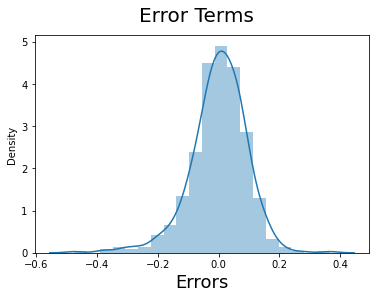

In [62]:
res = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)             # X-label
plt.show()

INSIGHT: 
- From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid. ---

## There is a linear relationship between X and Y

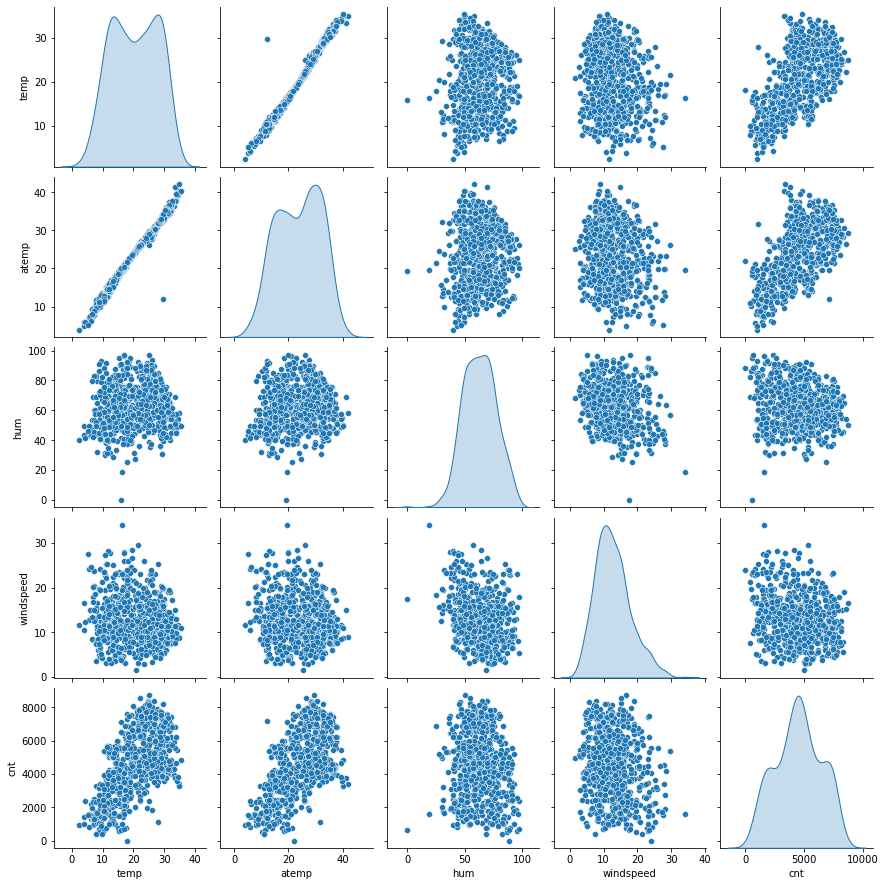

In [63]:
data_num=data_new[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(data_num, diag_kind='kde')
plt.show()

INSIGHT: 
- Using the pair plot, we could see there is a linear relation between temp and atemp variable with the predictor ‘cnt’. ---

## There is No Multicollinearity between the predictor variables

In [64]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,4.86
0,temp,4.22
3,season_Winter,2.33
2,season_Spring,2.28
4,yr_2019,2.04
7,mnth_Nov,1.80
6,mnth_Jan,1.58
10,weathersit_Mist+Cloudy,1.50
5,mnth_Dec,1.37
8,mnth_Sep,1.17


#### INSIGHT: 
- From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5. ---

### Little or No autocorrelation in the residuals:
Autocorrelation occurs when the residual errors are dependent on each other.The presence of correlation in error terms drastically reduces model’s accuracy.This usually occurs in time series models where the next instant is dependent on previous instant.

Autocorrelation can be tested with the help of Durbin-Watson test.The null hypothesis of the test is that there is no serial correlation.
The test statistic is approximately equal to 2*(1-r) where r is the sample autocorrelation of the residuals. Thus, for r == 0, indicating no serial correlation, the test statistic equals 2. This statistic will always be between 0 and 4. The closer to 0 the statistic, the more evidence for positive serial correlation. The closer to 4, the more evidence for negative serial correlation.

In [65]:
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     213.9
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.08e-180
Time:                        21:00:26   Log-Likelihood:                 484.14
No. Observations:                 510   AIC:                            -944.3
Df Residuals:                     498   BIC:                            -893.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

#### INSIGHT:
From the above summary note that the value of Durbin-Watson test is 2.001 quite close to 2 as said before when the value of Durbin-Watson is equal to 2, r takes the value 0 from the equation 2*(1-r),which in turn tells us that the residuals are not correlated.

## MAKING PREDICTION USING FINAL MODEL

Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr5)

#### Applying the scaling on the test sets

In [66]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [67]:
df_test.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light_Rain,weathersit_Mist+Cloudy
22,0,1,0.046591,0.025950,0.453529,0.462217,0.110907,1,0,0,...,0,0,0,1,0,0,0,0,0,0
468,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,0,1,0,...,0,0,0,0,0,0,0,0,0,0
553,0,1,0.951196,0.933712,0.596104,0.212829,0.534975,0,0,0,...,0,0,1,0,0,0,0,0,0,0
504,0,1,0.699909,0.662746,0.551083,0.478229,0.817648,0,1,0,...,0,0,1,0,0,0,0,0,0,0
353,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,1,...,0,0,0,0,0,1,0,0,0,1


In [68]:
df_test.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light_Rain,weathersit_Mist+Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.041096,0.689498,0.551225,0.527528,0.662567,0.346706,0.518889,0.237443,0.264840,0.251142,...,0.086758,0.082192,0.146119,0.123288,0.168950,0.150685,0.132420,0.141553,0.036530,0.324201
std,0.198967,0.463759,0.229463,0.215434,0.143562,0.159553,0.219953,0.426491,0.442259,0.434663,...,0.282125,0.275286,0.354034,0.329520,0.375566,0.358561,0.339723,0.349389,0.188034,0.469148
min,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.356479,0.348019,0.553031,0.232689,0.364703,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.557653,0.549198,0.662338,0.328208,0.525771,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.751309,0.709163,0.762338,0.435708,0.676887,0.000000,1.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [69]:
y_test = df_test.pop('cnt')
X_test = df_test

X_test.info()



# y_test = df_test.pop('cnt')
# X_test = df_test

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   holiday                 219 non-null    int64  
 1   workingday              219 non-null    int64  
 2   temp                    219 non-null    float64
 3   atemp                   219 non-null    float64
 4   hum                     219 non-null    float64
 5   windspeed               219 non-null    float64
 6   season_Spring           219 non-null    uint8  
 7   season_Summer           219 non-null    uint8  
 8   season_Winter           219 non-null    uint8  
 9   yr_2019                 219 non-null    uint8  
 10  mnth_Aug                219 non-null    uint8  
 11  mnth_Dec                219 non-null    uint8  
 12  mnth_Feb                219 non-null    uint8  
 13  mnth_Jan                219 non-null    uint8  
 14  mnth_Jul                219 non-null    u

In [70]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns

X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm5 = sm.add_constant(X_test)

X_test_lm5.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   const                   219 non-null    float64
 1   temp                    219 non-null    float64
 2   windspeed               219 non-null    float64
 3   season_Spring           219 non-null    uint8  
 4   season_Winter           219 non-null    uint8  
 5   yr_2019                 219 non-null    uint8  
 6   mnth_Dec                219 non-null    uint8  
 7   mnth_Jan                219 non-null    uint8  
 8   mnth_Nov                219 non-null    uint8  
 9   mnth_Sep                219 non-null    uint8  
 10  weathersit_Light_Rain   219 non-null    uint8  
 11  weathersit_Mist+Cloudy  219 non-null    uint8  
dtypes: float64(3), uint8(9)
memory usage: 8.8 KB


In [71]:
# Making predictions using the final model (lr6)

y_pred = lr5.predict(X_test_lm5)

## MODEL EVALUATION

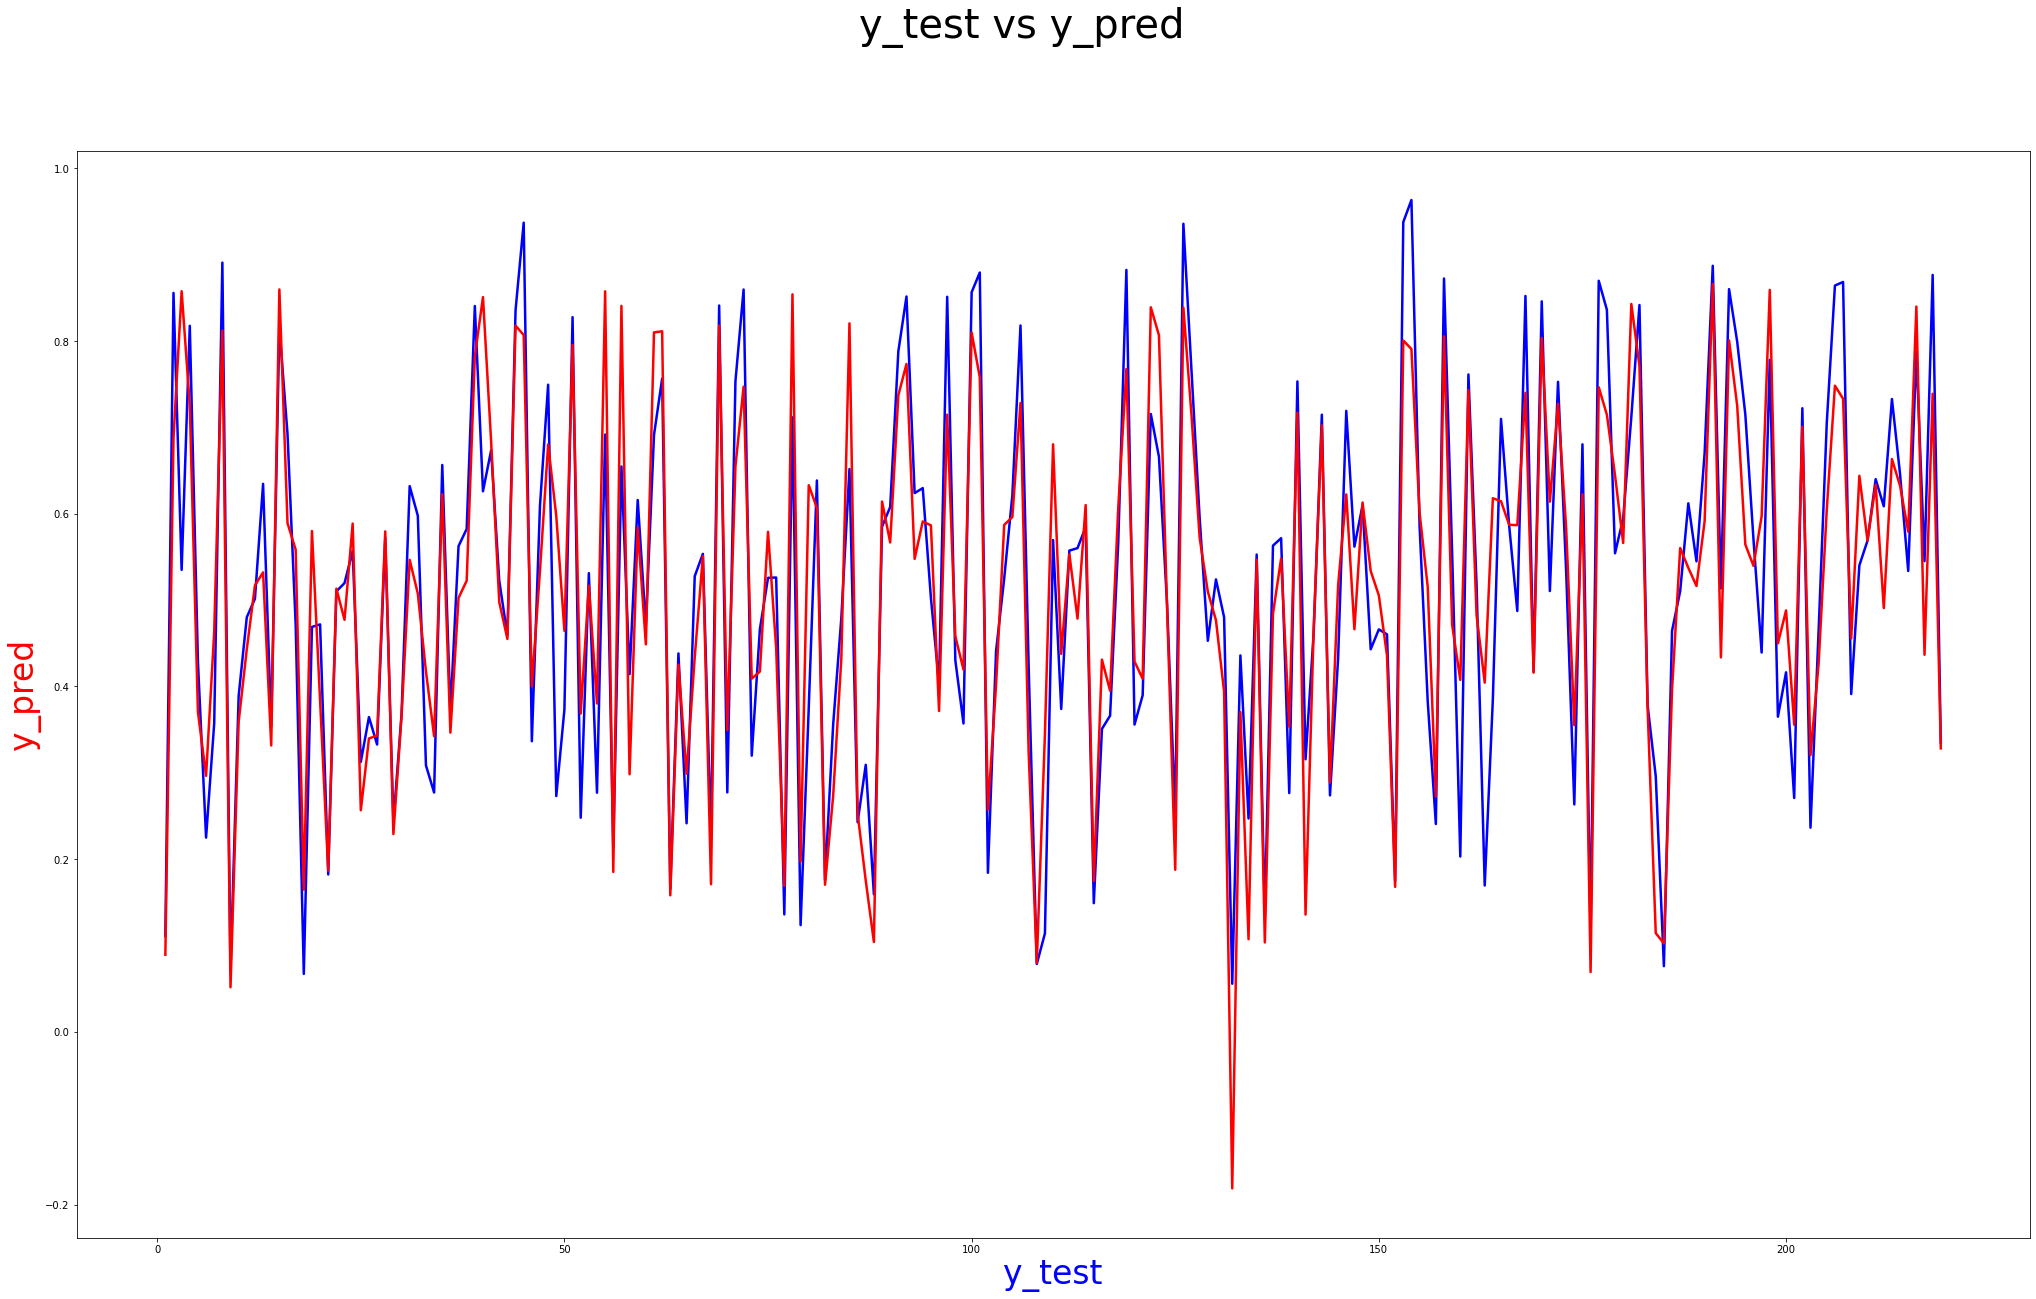

In [72]:
#Actual vs Predicted
c = [i for i in range(1,220,1)]
fig = plt.figure(figsize = (35,20))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('y_test vs y_pred', fontsize = 40) 
plt.xlabel('y_test',color="blue", fontsize = 33)                          # X-label
plt.ylabel('',  color="red",fontsize = 33)                          # y-label
plt.show()

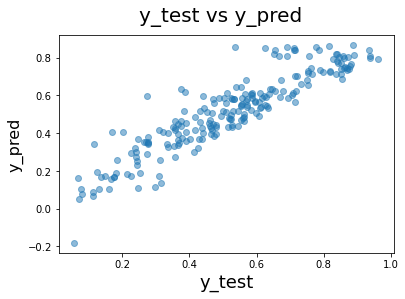

In [73]:
# Plotting y_test and y_pred to understand the spread
# import matplotlib.pyplot as plt
# import numpy as np

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)
plt.show()

## R^2 Value for TEST

In [74]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8234072367907921

#### Adjusted R^2 Value for TEST
Formula for Adjusted R^2

R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}

In [75]:
# We already have the value of R^2 (calculated in above step)

r2=0.8234072367907921

In [76]:
# Get the shape of X_test

X_test.shape

(219, 11)

In [77]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8140230802917521

## Final Result Comparison

#### FINAL RESULT COMPARISON: 
--- 
- Train R^2 :0.825 - Train Adjusted R^2 :0.821 
--- 
- Test R^2 :0.8234 - Test Adjusted R^2 :0.8140 
--- 
- This seems to be a really good model that can very well 'Generalize' various datasets. 
---

## FINAL REPORT

### As per our final Model, the top 3 predictor variables that influences the bike booking are: 
--- 
- Temperature (``temp``) - A coefficient value of ``0.367907`` indicated that a unit increase in temp variable increases the bike hire numbers by 0.367907 units.
---
- Weather Situation 3 (``weathersit_Light_Rain``) - A coefficient value of ``-0.311584`` indicated that, w.r.t weathersit_Light_Rain, a unit increase in weathersit_Light_Rain variable decreases the bike hire numbers by 0.311584 units.
---
- Year (``yr_2019``) - A coefficient value of ``0.235127`` indicated that a unit increase in yr_2019 variable increases the bike hire numbers by 0.235127 units. 
--- 
SO IT IS RECOMMENDED TO GIVE THESE VARIABLES UTMOST IMPORTANCE WHILE PLANNING, TO ACHIEVE MAXIMUM BOOKING. 

--- 
#### The next best features that can also be considered are - 
- ``season_Winter``: A coefficient value of ‘0.070252’ indicated that w.r.t season_Winter, a unit increase in season_Winter variable increases the bike hire numbers by 0.070252 units.
---
- ``windspeed``: A coefficient value of ‘-0.148355’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.148355 units.
---
- ``season_Spring``: A coefficient value of ‘-0.114329’ indicated that w.r.t season_Spring, a unit increase in season_Spring variable decreases the bike hire numbers by 0.114329 units.
---
- ``mnth_Sep``: A coefficient value of ‘0.060410’ indicated that w.r.t mnth_Sep, a unit increase in mnth_Sep variable increases the bike hire numbers by 0.060410 units.

--- 
NOTE: 
 - The details of weathersit_Mist+Cloudy & weathersit_Light_Rain  
 - ``weathersit_Mist+Cloudy`` : Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
 - ``weathersit_Light_Rain``: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
 - The details of season1 & season4 
    - ``season_Spring`` : spring 
    - ``season_Winter`` : winter